In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
path_file = '/home/br4b0/datascience-files-examples/heart_cleveland_upload.csv'
df = pd.read_csv(path_file)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


## Evaluation
Se conseguirmos atingir 95% de precisão em prever se um paciente tem ou não uma doença cardíaca durante o desenvolvimento
do moldelo, continuaremos com o projeto.



## Atributos

- age: idade em anos
- sex: sexo (1= masculino; 0 = feminino)
- cp (chest pain type) 'tipo de dor no peito:
    + 0 : angina típica (dor no peito típica)
    + 1 : angina atípica (dor no peito, não relecionado ao coração)
    + 2 : dor não anginosa (espamos, não relacionados ao coração)
    + 3 : assintomático (dor torácica, sem sinais de doença)
- trestbps: pressão arterial em repouso (valores entre 130-140 é motivo de preocupação)
- chol: colesterol em mg/dl (acima de 200 é motivo de preocupação)
- fbs: glicemia em jejum > 120 mg/dl (1 = verdadeiro; 0 = falso) (>126mg/dl sinal de diabetes)
- restecg: resultados eletro. em repouso (0 = normal; 1 = anormalidade, 2 = hipertrofia ventricular)
- thalach: frequência cardíaca máxima
- exang: dor induzida pelo exercício (1 = sim; 0 = não)
- oldpeak: depressão induzida pelo exercício *observa o estresse do coração durante o exercício)
- slope: inclinação do segmento do exercício (0 = ascendente; 1= plano; 2 = descendente)
- ca: número de vasos principais (0-3) coloridos por fluorosopia (vaso colorido significa que o médico pode ser o sangue passando)
- thal: resultado do estresse de tálio (0 = normal; 1 = defeito corrigido; 2 = defeito reversível)
- condition: 0 = sem doença; 1 = com doença

## Eda


In [8]:
df["condition"].value_counts(normalize=True) # valor em percentual dos pacientes acometidos ou não pela doença
# dá pra usar o value_counts() para encontrar o valor inteiro.

condition
0    0.538721
1    0.461279
Name: proportion, dtype: float64

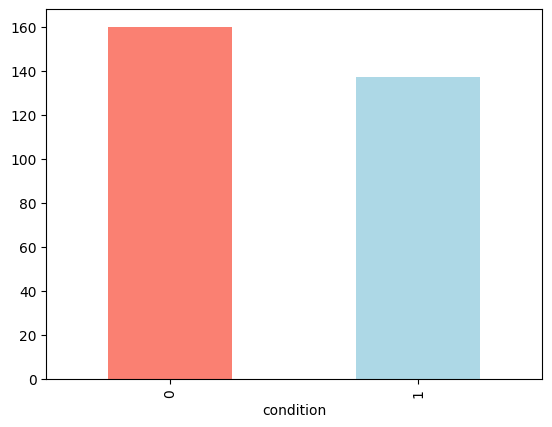

In [12]:
#avaliando pelo gráfico

df["condition"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

# Formatando e limpando os dados

In [63]:
df.info # para checar valores ausentes

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0 

In [69]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [20]:
pd.crosstab(df["condition"], df["sex"])

sex,0,1
condition,,
0,71,89
1,25,112


percebemos aqui que (71 + 25 = 96 são mulheres) e que (89+112 = 201 são homens)
 e que 25/96 = 26% são acometidas pela doença (mulheres) enquanto que 112/201 = 55% são acometidos pela doença (homens)

-  ou seja se o paciente for do sexo masculino, 55% das vezes ele terá doença cardíaca.

mostrando em um gráfico:

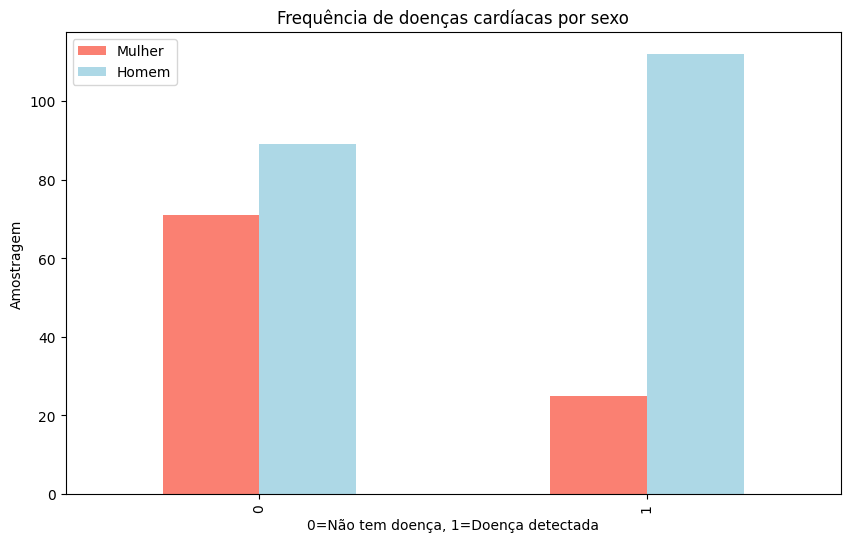

In [25]:
pd.crosstab(df["condition"], df["sex"]).plot(kind="bar",
                                            figsize=(10,6),
                                            color=["salmon", "lightblue"])
plt.title("Frequência de doenças cardíacas por sexo")
plt.xlabel("0=Não tem doença, 1=Doença detectada")
plt.ylabel("Amostragem")
plt.legend(["Mulher", "Homem"]);
        

Text(0, 0.5, 'Frequência cardíaca máxima')

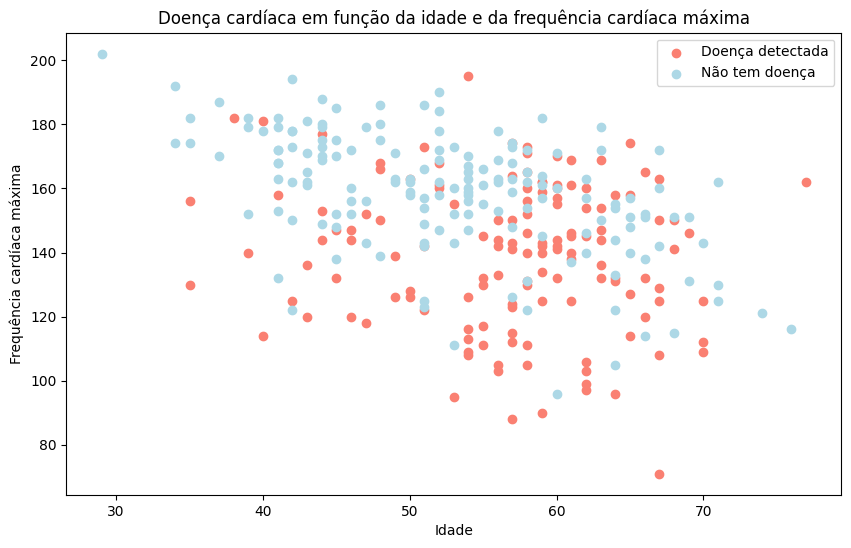

In [38]:
plt.figure(figsize=(10,6))

#plot para valores positivos
plt.scatter(df["age"][df["condition"] == 1],
           df["thalach"][df["condition"] == 1],
            c="salmon")

#plot para valores negativos

plt.scatter(df["age"][df["condition"] == 0],
           df["thalach"][df["condition"] == 0],
            c="lightblue")
plt.title("Doença cardíaca em função da idade e da frequência cardíaca máxima")
plt.xlabel("Idade")
plt.legend(["Doença detectada", "Não tem doença"])
plt.ylabel("Frequência cardíaca máxima")


Observamos que quanto menor a idade da pessoa, maior sua frequência cardíaca máxima.

In [55]:
#achei estranho o valor > 200 ser de uma pessoa que não doença, então vou verificar olhando na linha.
df[df['thalach'] > 200]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
71,29,1,1,130,204,0,2,202,0,0.0,0,0,0,0


In [56]:
# de fato a pessoa que possui um valor com 'thalach' superior a 200 não foi acometida pela doença

df.iloc[71] #outra forma de ver depois de ter encontrado o indíce 71

age           29.0
sex            1.0
cp             1.0
trestbps     130.0
chol         204.0
fbs            0.0
restecg        2.0
thalach      202.0
exang          0.0
oldpeak        0.0
slope          0.0
ca             0.0
thal           0.0
condition      0.0
Name: 71, dtype: float64

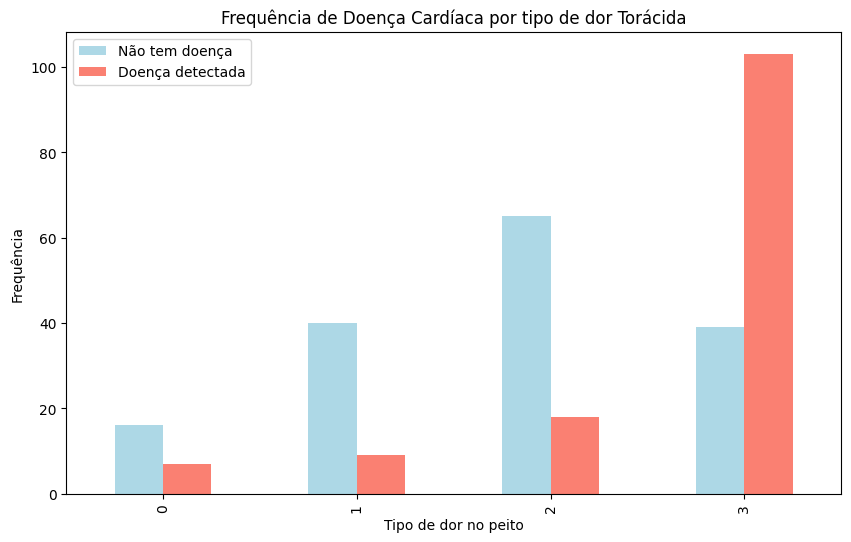

In [62]:
pd.crosstab(df["cp"], df["condition"]).plot(kind='bar',
                                            figsize=(10,6),
                                            color=["lightblue", "salmon"])
plt.title("Frequência de Doença Cardíaca por tipo de dor Torácida")
plt.xlabel("Tipo de dor no peito")
plt.ylabel("Frequência")
plt.legend(["Não tem doença", "Doença detectada"]);

**cp (dor no peito)**

- 0 : angina típica (dor no peito típica)
- 1 : angina atípica (dor no peito, não relecionada ao coração)
- 2 : dor não anginosa (espamos, não relacionado ao coração)
- 3 : assintomático (dor torácica, sem sinais de doença)

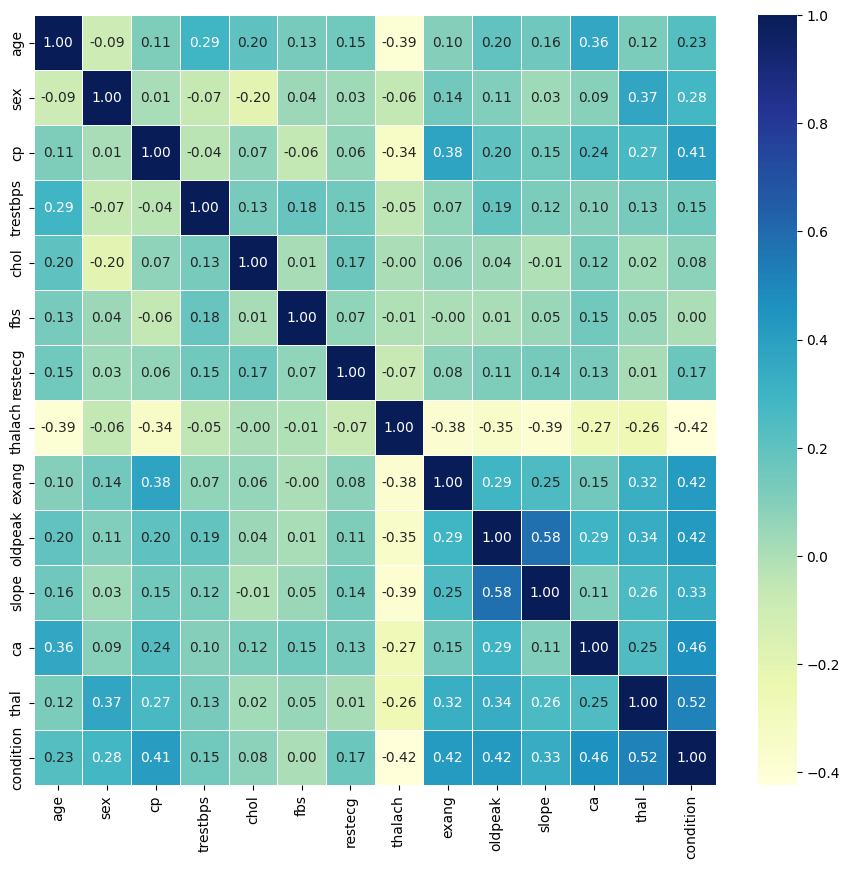

In [77]:
corr_matrix = df.corr() #matrix de correlação
plt.figure(figsize=(11,10))
sns.heatmap(corr_matrix,
           annot=True,   #valores
           linewidths=0.5,  #espessura da linha
            fmt=".2f",      #formatação
            cmap="YlGnBu"); #cor (verificar documentação)


Observando os dados, não dá pra considerar nenhuma correlação MUITO forte entra as variáveis.

# Modelagem dos dados

In [82]:
X = df.drop("condition", axis=1)   # X e y são bem comuns utilizados na literatura
y = df["condition"]

In [86]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [84]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

# Dividindo os dados entre treino e teste
o conjunto de teste sempre deve permanecer isolado do de treino

In [87]:
from sklearn.model_selection import train_test_split


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)   # selecionando 20% dos dados para teste

In [91]:
len(X_train), len(y_train)

(237, 237)

In [94]:
len(X_test), len(y_test)

(60, 60)

In [96]:
# testando 3 algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [106]:
models = {'KNN': KNeighborsClassifier(),
          'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():  #percorrendo os valores listados no dict models, onde o name é a chave e model é o valor
        model.fit(X_train, y_train) # função .fit serve para treinar o modelo
        model_scores[name] = model.score(X_test, y_test) # score é processo de avaliação
    return model_scores
        
    
    

In [107]:
fit_and_score(models=models,
             X_train=X_train,
             X_test=X_test,
             y_train=y_train,
             y_test=y_test)

/home/br4b0/.virtualenvs/ambiente-python/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.5833333333333334,
 'Logistic Regression': 0.85,
 'Random Forest': 0.7833333333333333}

#### percebemos que random forest e Logistic Regression tiveram o melhor desempenho, mas vamos ajustar pra melhorar os resultados.
# Ajuste de hiperparâmetros e validação cruzada

In [118]:
train_scores = []
test_scores = []
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)

    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))

    test_scores.append(knn.score(X_test, y_test))



In [119]:
train_scores

[1.0,
 0.7763713080168776,
 0.8016877637130801,
 0.7257383966244726,
 0.7805907172995781,
 0.759493670886076,
 0.7679324894514767,
 0.7383966244725738,
 0.7341772151898734,
 0.7088607594936709,
 0.7257383966244726,
 0.7215189873417721,
 0.729957805907173,
 0.7215189873417721,
 0.7130801687763713,
 0.7088607594936709,
 0.7215189873417721,
 0.7341772151898734,
 0.7341772151898734,
 0.7215189873417721]

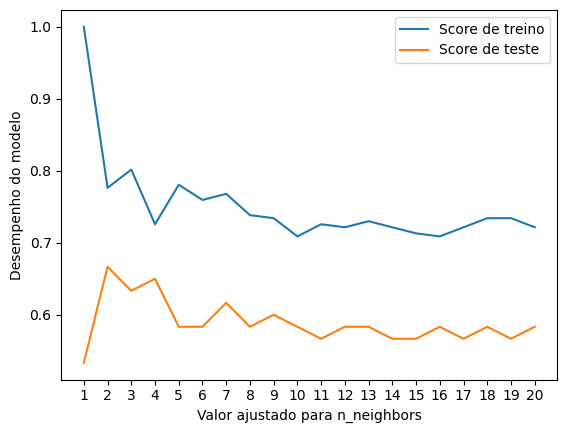

In [134]:
plt.plot(neighbors, train_scores, label='Score de treino')
plt.plot(neighbors, test_scores, label='Score de teste')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Valor ajustado para n_neighbors')
plt.ylabel('Desempenho do modelo')
plt.legend();

In [135]:
print(f'Desempenho máximo de KNN nos dados de teste: {max(test_scores)*100:.2f}%')

#agora realizado os hiperparametros e obtidos valor de Knn que não chega perto dos outros dois algoritmos, podemos decartar 
# o knn e focar nos outros dois

Desempenho máximo de KNN nos dados de teste: 66.67%


# RandomizedSearchCV

In [144]:
logreg_grid = {'C':np.logspace(-4, 4, 20),    #dict para Logistic Regression ler doc hiperparametros para logreg
              'solver':['liblinear'] 
              }
rf_grid = {'n_estimators':np.arange(10,100,50),  #dict para Random Forest ler doc hiperparametros para random forest
          'max_depth':[None, 3, 5, 10],  
          'min_samples_split':np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1,20,2)}   

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [150]:
rscv_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=logreg_grid,
                                 n_iter=20,
                                 cv=5,
                                 verbose=True)

rscv_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [151]:
rscv_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [152]:
rscv_log_reg.score(X_test, y_test)   # teve um resultado 2% menor do que na primeira versão


0.8333333333333334

In [157]:
# fazendo a mesma coisa para Random Forest

rscv_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

rscv_rf.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [158]:
rscv_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [159]:
rscv_rf.score(X_test, y_test)
# aumento de mais ou meneos 4%

0.8166666666666667

# Fazendo mais um teste com os dois algoritmos com GridSearchCV


In [160]:
from sklearn.model_selection import GridSearchCV

In [161]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=logreg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train);

                          
                          

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [164]:
gs_log_reg.best_params_   #deu o mesmo resultado que o anterior para log reg

{'C': 4.281332398719396, 'solver': 'liblinear'}

In [165]:
gs_log_reg.score(X_test, y_test)

0.8333333333333334

# Avaliar o Modelo
                     

In [182]:
# avaliar os diagnosticos : verdadeiros positivos com falsos positivos
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


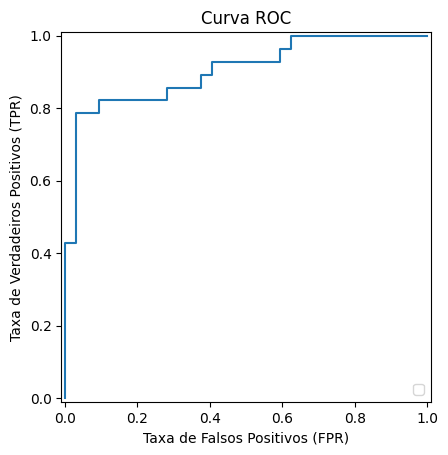

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


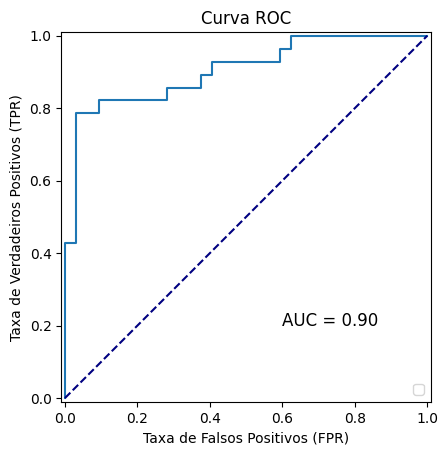

In [183]:
# Suponha que você tenha seu modelo treinado e as previsões de probabilidade de classe positiva
# rscv_log_reg = ...
# X_test = ...
# y_test = ...

# Obter as previsões de probabilidade de classe positiva
y_proba = rscv_log_reg.predict_proba(X_test)[:, 1]

# Calcular as taxas de verdadeiros positivos (TPR) e falsos positivos (FPR)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plotar a curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Adicionar rótulos e título
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')

# Exibir a plotagem
plt.show()







# Suponha que você tenha seu modelo treinado e as previsões de probabilidade de classe positiva
# model = ...
# X_test = ...
# y_test = ...

# Obter as previsões de probabilidade de classe positiva
y_proba = rscv_log_reg.predict_proba(X_test)[:, 1]


# Calcular as taxas de verdadeiros positivos (TPR) e falsos positivos (FPR)
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Plotar a curva ROC
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Adicionar linha diagonal para referência
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Adicionar rótulos e título
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')

# Calcular a AUC
auc = roc_auc_score(y_test, y_proba)
plt.text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12)

# Exibir a plotagem
plt.show()

modelo consegue prever bem verdadeiros positivos

# Matriz de confusão
#### ou onde o modedelo fez as previsões certas e onde fez as erradas (ou onde ele ficou confuso)

In [184]:
y_preds = rscv_log_reg.predict(X_test)

In [185]:
y_preds

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [186]:
np.array(y_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [188]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

[[27  5]
 [ 5 23]]


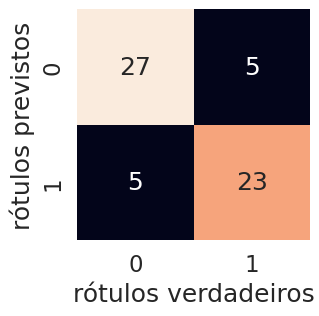

In [193]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False)

plt.xlabel('rótulos verdadeiros')
plt.ylabel('rótulos previstos');


- no elemento a12(5) da matriz, por exemplo lê se que em 5 ocasiões, o modelo previu 0 quando deveria prever 1
- do outro lado a21(5), em outras 5 ocasiões ele previu 1 quando deveria prever 0

## Relatório de classificação

In [195]:
from sklearn.metrics import classification_report

In [197]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        32
           1       0.82      0.82      0.82        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60

